In [17]:
# Predict GDP, life expectancy by air quality or whow air quality in terms of other metrics
# let citizen know what in fact means by the air quality
# some other data downloaded manually...
# http://aidef.apps.eea.europa.eu/?source=%7B%22query%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22range%22%3A%7B%22AQValue%22%3A%7B%22from%22%3A%2236%22%2C%22to%22%3A%22155318000000000000000%22%7D%7D%7D%2C%7B%22term%22%3A%7B%22Pollutant%22%3A%222-Methyl%20Naphthalene%20(precip%2Bdry_dep)%22%7D%7D%5D%7D%7D%2C%22display_type%22%3A%22tabular%22%7D
# http://discomap.eea.europa.eu/map/fme/AirQualityExport.htm

import wbdata
import pandas
import matplotlib.pyplot as plt

def printwbdata(code,var,countries):
    #set up the countries I want
    countries = ["FI",'SE','EE','LV','LT','NO','DK','GL']
    
    #set up the indicator I want (just build up the dict if you want more than one)
    indicators = {code : var}
    
    #grab indicators above for countires above and load into data frame
    df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
    return df

def plotwbdata(df,var):
    #df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
    dfu = df.unstack(level=0)

    # a simple matplotlib plot with legend, labels and a title
    dfu.plot();
    plt.legend(loc='best');
    plt.title(var);
    plt.xlabel('Date'); plt.ylabel(var);
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.show()

In [20]:
data_y

NOx emission
country date              
Denmark 2018           NaN
        2017           NaN
        2016           NaN
        2015           NaN
        2014           NaN
        2013           NaN
        2012   5340.426051
        2011   5374.498026
        2010   5409.965000
        2009   5408.570000
        2008   5615.774000
        2007   5650.091000
        2006   5735.496000
        2005   5739.805000
        2004   6309.771000
        2003   6775.236000
        2002   6600.055000
        2001   6837.143000
        2000   7094.846000
        1999   7253.256000
        1998   7378.403000
        1997   7548.190000
        1996   7644.693000
        1995   7595.837000
        1994   7652.412000
        1993   7736.236000
        1992   7644.569000
        1991   8123.984000
        1990   8290.237000
        1989   8724.454000
...                    ...
Sweden  1989   6941.272000
        1988   6914.519000
        1987   7234.687000
        1986   7481.447000
        1985   7880.882000
        1984   7976.765000
        1983   7852.455000
        1982   7659.542000
        1981   7776.009000
        1980   7856.175000
        1979   7870.218000
        1978   7841.388000
        1977   7711.374000
        1976   7742.281000
        1975   7952.089000
        1974   7887.640000
        1973   7964.055000
        1972   7637.346000
        1971   7681.707000
        1970   7318.387000
        1969           NaN
        1968           NaN
        1967           NaN
        1966           NaN
        1965           NaN
        1964           NaN
        1963           NaN
        1962           NaN
        1961           NaN
        1960           NaN

[472 rows x 1 columns]

In [11]:
#set up the countries I want
countries = ["FI",'SE','EE','LV','LT','NO','DK','GL']

var = ['NOx emission','PM2.5 exposure','methane emission','CO2 emission']
code = ['EN.ATM.NOXE.KT.CE','EN.ATM.PM25.MC.M3','EN.ATM.METH.KT.CE','EN.ATM.CO2E.KT']

var_other = ['GNI per Capita','GDP per capita in US$','GDP growth','mortality rate, adult, male','mortality rate, adult, female','life expectancy']
code_other = ['NY.GNP.PCAP.CD','NY.GDP.PCAP.CD','NY.GDP.MKTP.KD.ZG','SP.DYN.AMRT.MA','SP.DYN.AMRT.FE','SP.DYN.LE00.IN']

In [12]:
data_y = printwbdata(code[0],var[0],countries)
data_a = printwbdata(code_other[0],var_other[0],countries)
data_b = printwbdata(code_other[1],var_other[1],countries)
data_c = printwbdata(code_other[2],var_other[2],countries)
data_d = printwbdata(code_other[3],var_other[3],countries)
data_e = printwbdata(code_other[4],var_other[4],countries)
data_f = printwbdata(code_other[5],var_other[5],countries)

combined = pandas.concat([data_y,data_a, data_b, data_c, data_d, data_e, data_f], axis=1, ignore_index=False)
combined = combined.dropna()

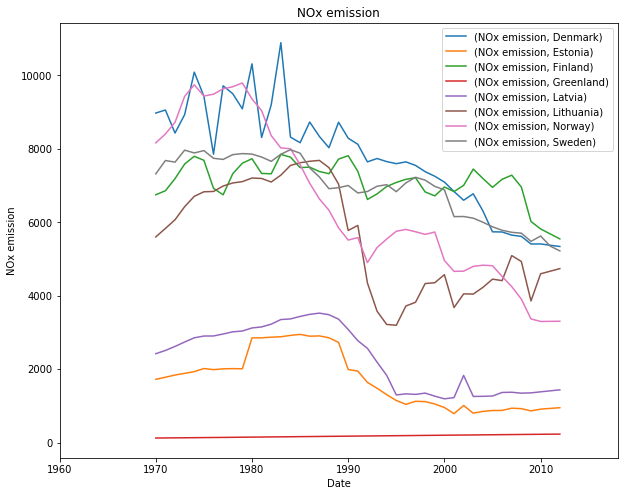

In [13]:
# plot the data 
plotwbdata(data_y,var[0])

x =GNI per Capita
Country: Denmark; R2 = 0.8258101364150302; a = [115283.21174575]; b = [[-11.30287812]]


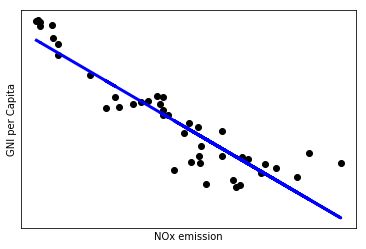

x =GNI per Capita
Country: Estonia; R2 = 0.06323268268469584; a = [-6591.89306367]; b = [[19.13824136]]


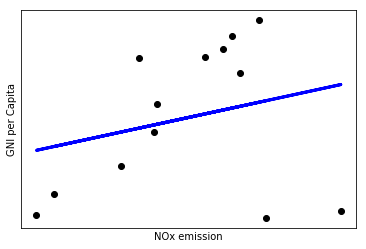

x =GNI per Capita
Country: Finland; R2 = 0.3454039307989193; a = [132949.61392032]; b = [[-15.58925517]]


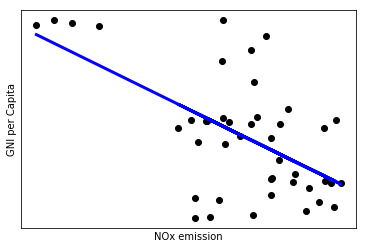

x =GNI per Capita
Country: Greenland; R2 = 0.47649028370029917; a = [40775.3695966]; b = [[-103.91144803]]


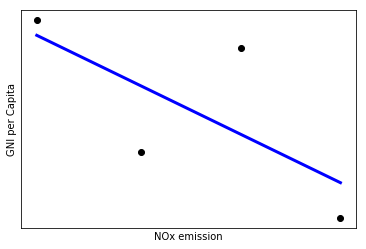

x =GNI per Capita
Country: Latvia; R2 = 0.025343749249146952; a = [1021.743764]; b = [[4.98916343]]


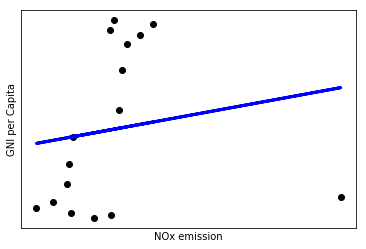

x =GNI per Capita
Country: Lithuania; R2 = 0.3265536854428027; a = [-19471.32521084]; b = [[6.20227323]]


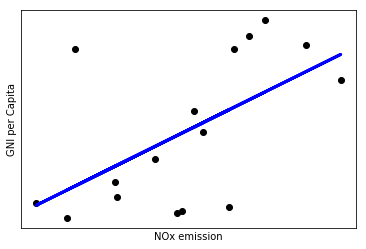

x =GNI per Capita
Country: Norway; R2 = 0.7453832906352109; a = [105947.76031741]; b = [[-11.09878537]]


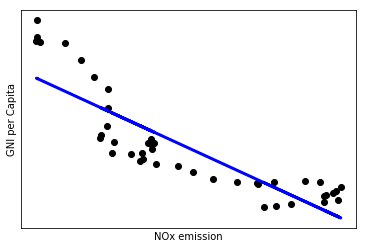

x =GNI per Capita
Country: Sweden; R2 = 0.8763123889425944; a = [145919.70955965]; b = [[-17.15031209]]


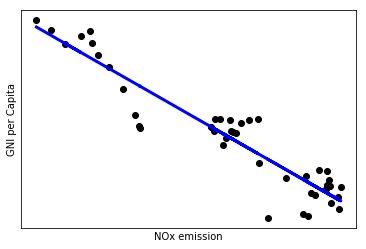

x =GDP per capita in US$
Country: Denmark; R2 = 0.8269949030277325; a = [115515.53889957]; b = [[-11.2892725]]


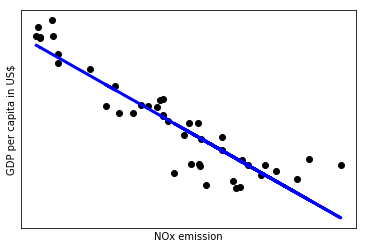

x =GDP per capita in US$
Country: Estonia; R2 = 0.0628283586939894; a = [-7003.73806178]; b = [[20.78827246]]


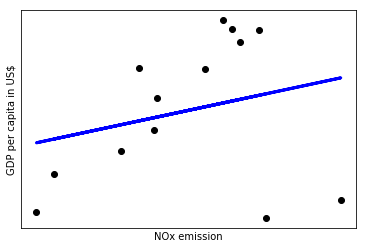

x =GDP per capita in US$
Country: Finland; R2 = 0.298619085396981; a = [126151.81760795]; b = [[-14.61120462]]


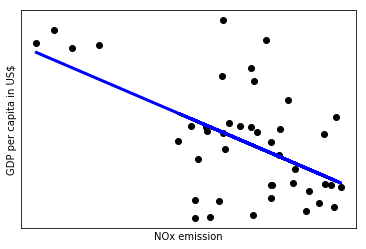

x =GDP per capita in US$
Country: Greenland; R2 = 0.7718350172850845; a = [58359.32597616]; b = [[-192.85270643]]


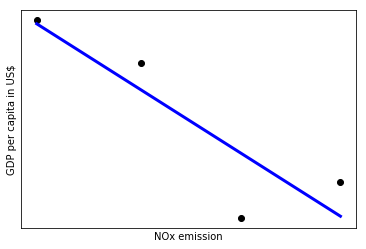

x =GDP per capita in US$
Country: Latvia; R2 = 0.022919121589862868; a = [1327.61802729]; b = [[5.02942668]]


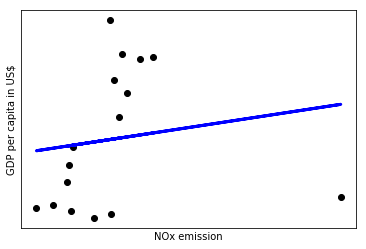

x =GDP per capita in US$
Country: Lithuania; R2 = 0.40373513414092; a = [-23636.05729382]; b = [[7.26586583]]


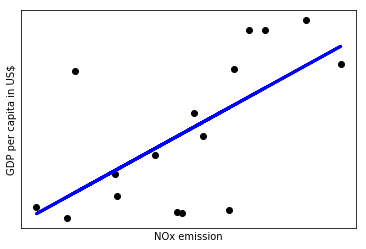

x =GDP per capita in US$
Country: Norway; R2 = 0.7333875998333461; a = [110016.43108859]; b = [[-11.56851507]]


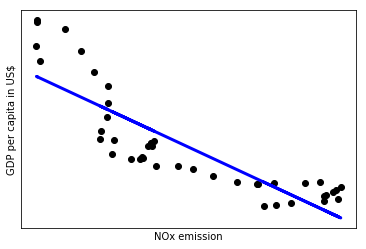

x =GDP per capita in US$
Country: Sweden; R2 = 0.8771070658193668; a = [145883.21716262]; b = [[-17.1580915]]


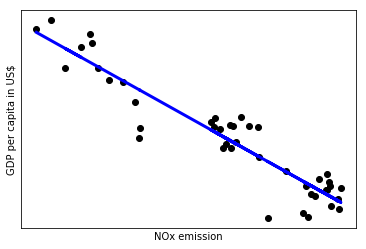

x =GDP growth
Country: Denmark; R2 = 0.025119109761918775; a = [0.13366774]; b = [[0.00022759]]


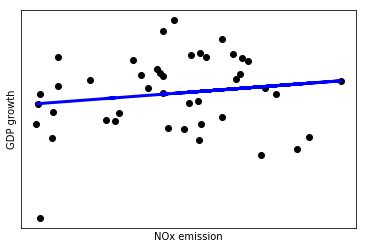

x =GDP growth
Country: Estonia; R2 = 0.003390108389812685; a = [-1.39822312]; b = [[0.00653036]]


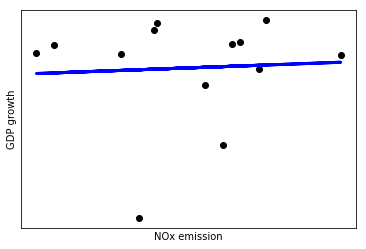

x =GDP growth
Country: Finland; R2 = 0.13808623950763765; a = [-12.43067589]; b = [[0.00213492]]


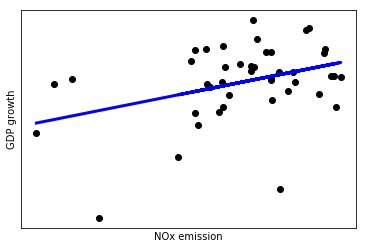

x =GDP growth
Country: Greenland; R2 = 0.25595986574227414; a = [115.0419916]; b = [[-0.55258022]]


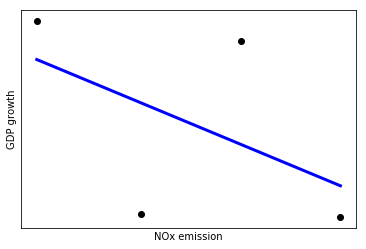

x =GDP growth
Country: Latvia; R2 = 0.0007074483505553619; a = [6.36397706]; b = [[-0.00124253]]


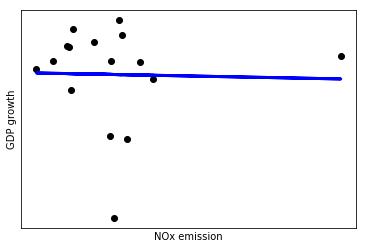

x =GDP growth
Country: Lithuania; R2 = 0.035686032893919806; a = [-7.79446556]; b = [[0.00285112]]


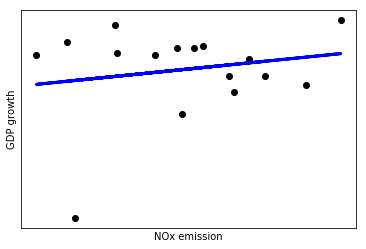

x =GDP growth
Country: Norway; R2 = 0.285535785246525; a = [0.02611213]; b = [[0.00046741]]


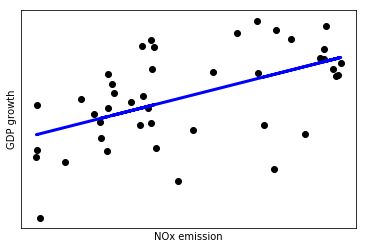

x =GDP growth
Country: Sweden; R2 = 0.010107387653774835; a = [0.31042174]; b = [[0.00026762]]


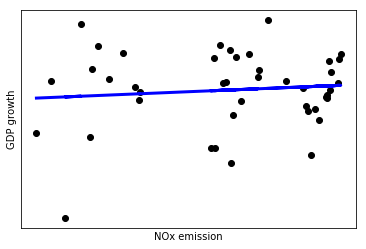

x =mortality rate, adult, male
Country: Denmark; R2 = 0.843637490138366; a = [31.33449583]; b = [[0.01428268]]


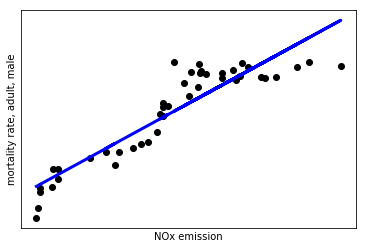

x =mortality rate, adult, male
Country: Estonia; R2 = 0.05897829730052051; a = [415.11031495]; b = [[-0.16846563]]


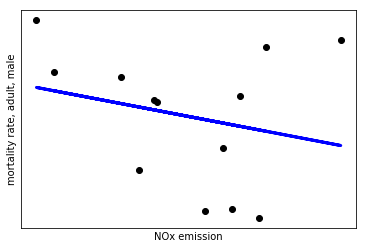

x =mortality rate, adult, male
Country: Finland; R2 = 0.24133196992471107; a = [-97.8898783]; b = [[0.03868611]]


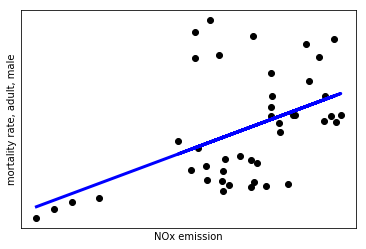

x =mortality rate, adult, male
Country: Greenland; R2 = 0.37563701272938693; a = [584.24862897]; b = [[-1.55952099]]


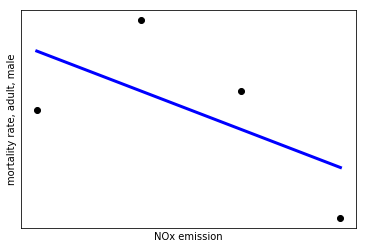

x =mortality rate, adult, male
Country: Latvia; R2 = 0.023068384758705096; a = [359.89794275]; b = [[-0.03724702]]


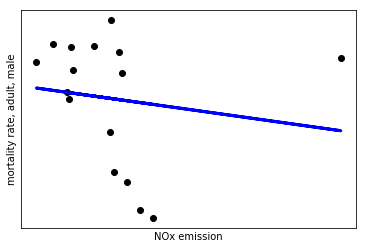

x =mortality rate, adult, male
Country: Lithuania; R2 = 0.02159864159191438; a = [268.04570914]; b = [[0.0087962]]


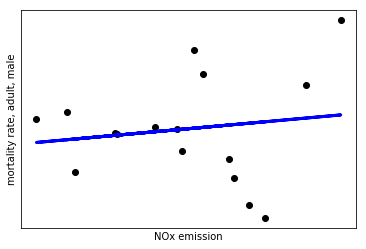

x =mortality rate, adult, male
Country: Norway; R2 = 0.8579999565005919; a = [45.52222977]; b = [[0.01162398]]


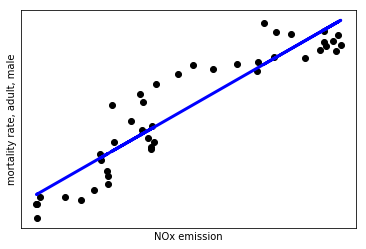

x =mortality rate, adult, male
Country: Sweden; R2 = 0.8363187355667951; a = [-94.99106388]; b = [[0.02962037]]


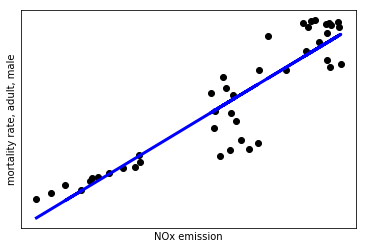

x =mortality rate, adult, female
Country: Denmark; R2 = 0.8113922741533989; a = [16.24466867]; b = [[0.00943125]]


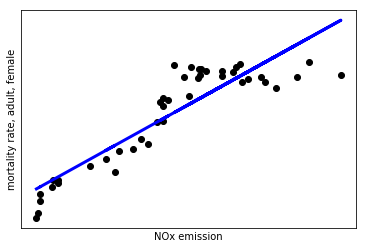

x =mortality rate, adult, female
Country: Estonia; R2 = 0.06878283517128037; a = [162.27462735]; b = [[-0.07674917]]


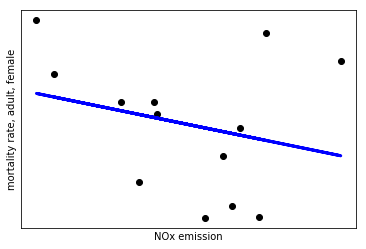

x =mortality rate, adult, female
Country: Finland; R2 = 0.1806274117312513; a = [0.31702136]; b = [[0.0097692]]


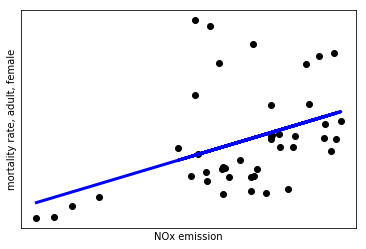

x =mortality rate, adult, female
Country: Greenland; R2 = 0.6986617740189311; a = [731.59201455]; b = [[-2.69882011]]


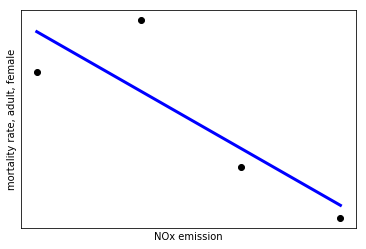

x =mortality rate, adult, female
Country: Latvia; R2 = 0.06360661387071587; a = [146.58986822]; b = [[-0.02316645]]


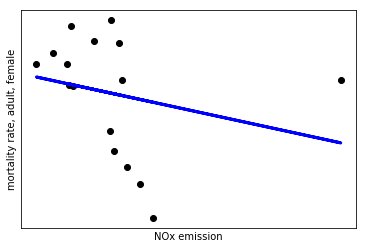

x =mortality rate, adult, female
Country: Lithuania; R2 = 0.021970492173207568; a = [94.23311518]; b = [[0.00292536]]


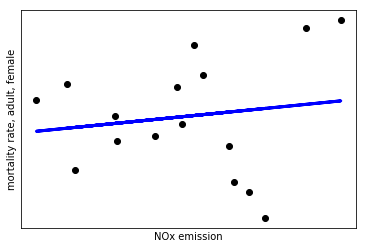

x =mortality rate, adult, female
Country: Norway; R2 = 0.7683259996653292; a = [42.05873033]; b = [[0.00336024]]


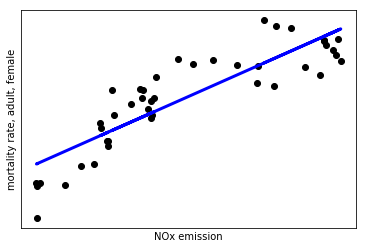

x =mortality rate, adult, female
Country: Sweden; R2 = 0.8099070976220251; a = [-26.96661432]; b = [[0.01300562]]


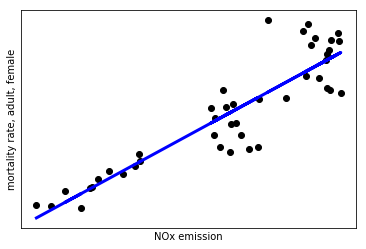

x =life expectancy
Country: Denmark; R2 = 0.8119905537837171; a = [84.46043874]; b = [[-0.00112883]]


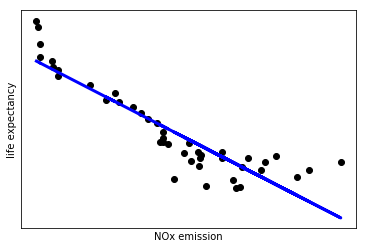

x =life expectancy
Country: Estonia; R2 = 0.06449121984048634; a = [65.372357]; b = [[0.00852924]]


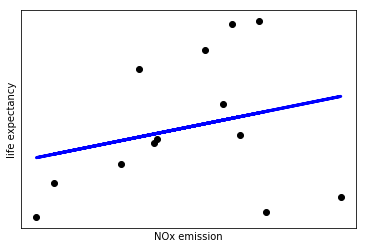

x =life expectancy
Country: Finland; R2 = 0.28203042679731005; a = [95.98100621]; b = [[-0.00287854]]


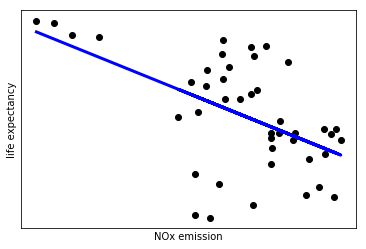

x =life expectancy
Country: Greenland; R2 = 0.9613802188710887; a = [27.65013807]; b = [[0.19539993]]


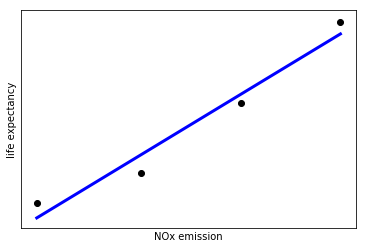

x =life expectancy
Country: Latvia; R2 = 0.035156722929781226; a = [68.81307156]; b = [[0.00194157]]


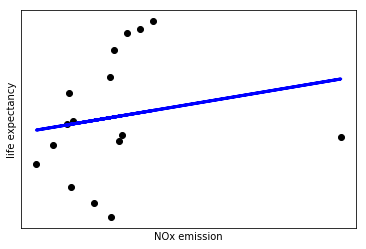

x =life expectancy
Country: Lithuania; R2 = 0.025638107585054026; a = [70.35913146]; b = [[0.000373]]


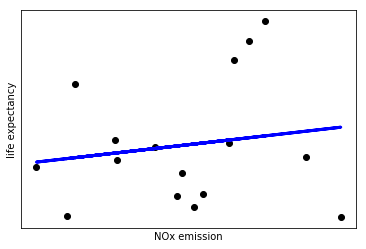

x =life expectancy
Country: Norway; R2 = 0.8249146409223589; a = [83.44364425]; b = [[-0.00093787]]


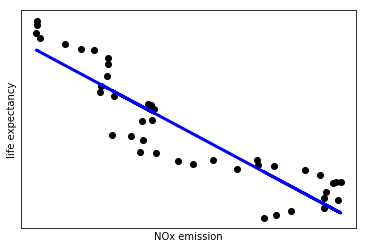

x =life expectancy
Country: Sweden; R2 = 0.8469497747463933; a = [95.30439627]; b = [[-0.00249366]]


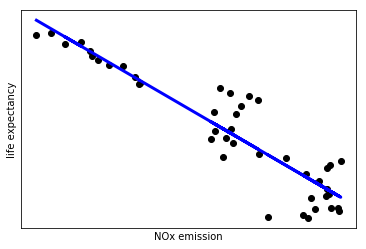

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
for j in combined.columns[1:]:
    for i in combined.index.levels[0]:
        regress_data = combined.loc[i]
        X = regress_data[regress_data.columns[0]].values.reshape(-1,1)
        y = regress_data[j].values.reshape(-1,1)
        reg = LinearRegression().fit(X,y)
        R2 = reg.score(X, y)
        b = reg.coef_
        a = reg.intercept_
        print('x =' + j)
        print('Country: ' + i + '; R2 = ' + str(R2) + '; a = ' + str(a) + '; b = ' + str(b))
        # Plot outputs
        plt.scatter(X, y,  color='black')
        plt.plot(X, a+X*b, color='blue', linewidth=3)
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(regress_data.columns[0]);plt.ylabel(j);
        plt.show()

In [226]:
data_y

NOx emission
country date              
Denmark 2018           NaN
        2017           NaN
        2016           NaN
        2015           NaN
        2014           NaN
        2013           NaN
        2012   5340.426051
        2011   5374.498026
        2010   5409.965000
        2009   5408.570000
        2008   5615.774000
        2007   5650.091000
        2006   5735.496000
        2005   5739.805000
        2004   6309.771000
        2003   6775.236000
        2002   6600.055000
        2001   6837.143000
        2000   7094.846000
        1999   7253.256000
        1998   7378.403000
        1997   7548.190000
        1996   7644.693000
        1995   7595.837000
        1994   7652.412000
        1993   7736.236000
        1992   7644.569000
        1991   8123.984000
        1990   8290.237000
        1989   8724.454000
...                    ...
Sweden  1989   6941.272000
        1988   6914.519000
        1987   7234.687000
        1986   7481.447000
        1985   7880.882000
        1984   7976.765000
        1983   7852.455000
        1982   7659.542000
        1981   7776.009000
        1980   7856.175000
        1979   7870.218000
        1978   7841.388000
        1977   7711.374000
        1976   7742.281000
        1975   7952.089000
        1974   7887.640000
        1973   7964.055000
        1972   7637.346000
        1971   7681.707000
        1970   7318.387000
        1969           NaN
        1968           NaN
        1967           NaN
        1966           NaN
        1965           NaN
        1964           NaN
        1963           NaN
        1962           NaN
        1961           NaN
        1960           NaN

[472 rows x 1 columns]